In [1]:
%matplotlib inline
#Load required modules
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.boxplots import violinplot
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
mpl.rc('text', usetex=True)
sns.set_context("notebook", font_scale=1.25)

# kDP

In [2]:
df_kDP = pd.read_csv("../script/kDP_results.csv")

In [3]:
def plotNumberOfSolved(ax):
    r = range(len(labels))
    df1 = df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)]
    df2 = df1[~df_kDP.time.isnull()].groupby(["m", "n", "k"]).count()['s'].unstack(["k"])
    df3= df2.reset_index()
    df3.fillna(0,inplace=True)
    df3=df3[df3['m'] == df3['n']]

    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df3[1], df3[2], df3[3])]
    greenBars = [i for i,j in zip(df3[1], totals)]
    orangeBars = [i for i,j in zip(df3[2], totals)]
    blueBars = [i for i,j in zip(df3[3], totals)]

    # plot
    barWidth = 0.55
    # Create green Bars
    k1 = plt.bar(r, greenBars, color=sns.color_palette()[0], width=barWidth, axes=ax)
    # Create orange Bars
    k2 = plt.bar(r, orangeBars, bottom=greenBars, color=sns.color_palette()[1], 
            width=barWidth, axes=ax)
    # Create blue Bars
    k3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], 
            color=sns.color_palette()[2], width=barWidth, axes=ax)
    ax.legend([k1,k2,k3],["1", "2", "3"],loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.04))
#     ax.set_xticks(r, names)
    ax.set_xticks(r, [1,3,5])
    ax.set_ylabel("\#solved instances")
    ax.set_ylim((0,200))
    ax.set_yticks(np.arange(0, 200, 20))
    ax.grid(axis="x", b=False)
    ax.set_xticklabels(['0'] + labels)

In [4]:
def plotFractionGeneratedVars(ax):
    df_kDP['fracvariables'] = df_kDP['vars'] / (df_kDP['m'] * df_kDP['n'] * (df_kDP['k'] + 2)) * 100
    sns.stripplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="fracvariables", 
                  x="m", hue="k", ax=ax, split=True, jitter=True, alpha=0.4, linewidth=1)
    sns.boxplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="fracvariables", 
                x="m", hue="k", ax=ax, showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], title="$k$", loc="upper right")
    ax.set_ylabel("generated variables [\%]")
    ax.set_xlabel("")
    ax.set_ylim((0,10))
    ax.set_xticklabels(labels)

In [5]:
def plotFractionGeneratedConstraints(ax):
    df_kDP['fracconstraints'] = np.log10(df_kDP['constraints'] / df_kDP['constraint_count'] * 100)
    sns.stripplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="fracconstraints", 
                  x="m", hue="k", ax=ax, split=True, jitter=True, alpha=0.4, linewidth=1)
    sns.boxplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="fracconstraints", 
                x="m", hue="k", ax=ax, showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], title="$k$", loc="lower left")
    ax.set_ylabel("generated constraints [\%]")
    ax.set_xlabel("")
    ax.set_xticklabels(labels)
    ax.set_ylim((-8,-3))
    ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$', 
                        '$10^{-3}$'])

In [6]:
def plotRunTime(ax):
    df_kDP['time_log'] = np.log10(df_kDP['time'])
    sns.stripplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="time_log", 
                  x="m", hue="k", ax=ax, split=True, jitter=True, alpha=0.4, linewidth=1)
    sns.boxplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="time_log", 
                x="m", hue="k", ax=ax, showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], title="$k$", loc="upper left")
    ax.set_ylabel("run time [s]")
    ax.set_xlabel("")
    ax.set_xticklabels(labels)
    ax.set_yticklabels(['0', '$1$', '$10$', '$10^2$', '$10^3$', '$10^4$'])

In [7]:
def plotIterationCount(ax):
    sns.stripplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="iterations", 
                  x="m", hue="k", ax=ax, split=True, jitter=True, alpha=0.4, linewidth=1)
    sns.boxplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="iterations", 
                x="m", hue="k", ax=ax, showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], title="$k$", loc="upper left")
    ax.set_ylabel("\# iterations")
    ax.set_xlabel("")
    ax.set_ylim((0,18))
    ax.set_xticklabels(labels)

In [8]:
def plotSparsity(ax):
    df_kDP['sparsity'] = (1 - df_kDP['density']) * 100
    sns.stripplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="sparsity", 
                  x="m", hue="k", ax=ax, split=True, jitter=True, alpha=0.4, linewidth=1)
    sns.boxplot(data=df_kDP[(df_kDP['m'] == df_kDP['n']) & (df_kDP['m'] < 200)], y="sparsity", 
                x="m", hue="k", ax=ax, showfliers=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], title="$k$", loc="lower right")
    ax.set_ylabel("0-entries [\%]")
    ax.set_xlabel("")
    ax.set_xticklabels(labels)

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


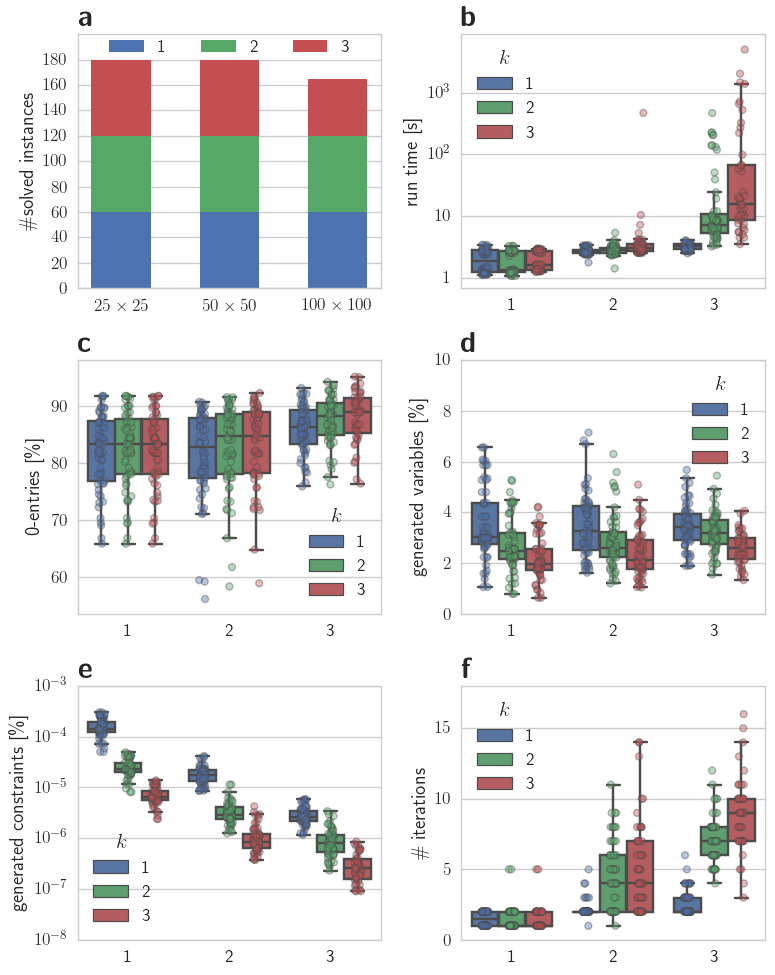

In [9]:
labels = ['$25 \\times 25$','$50 \\times 50$', '$100 \\times 100$']
nrRows = 3
nrCols = 2
ax = plt.subplot(nrRows,nrCols,1)
ax.set_title("\huge\\textbf{a}", loc='left')
plotNumberOfSolved(ax)
ax = plt.subplot(nrRows,nrCols,2)
ax.set_title("\huge\\textbf{b}", loc='left')
plotRunTime(ax)
ax = plt.subplot(nrRows,nrCols,3)
ax.set_title("\huge\\textbf{c}", loc='left')
plotSparsity(ax)
ax = plt.subplot(nrRows,nrCols,4)
ax.set_title("\huge\\textbf{d}", loc='left')
plotFractionGeneratedVars(ax)
ax = plt.subplot(nrRows,nrCols,5)
ax.set_title("\huge\\textbf{e}", loc='left')
plotFractionGeneratedConstraints(ax)
ax = plt.subplot(nrRows,nrCols,6)
ax.set_title("\huge\\textbf{f}", loc='left')
plotIterationCount(ax)
plt.gcf().set_size_inches(8, 10) 
plt.tight_layout()
plt.savefig("kDP-col.pdf")

In [10]:
print "\\begin{tabular}{|c|c||ccccc|ccccc|ccccc|}"
print "\\hline"
print "\\multirow{2}{*}{$m$} & ",
for n in [25,50,100]:
    print "& \multicolumn{5}{c|}{$n = %d$}" % n,
print "\\\\"
print "& $k$",
for n in [25,50,100]:
    print " & solved & sec & \#it. & vars. & cons.",
print "\\\\"
print "\\hline"
for m in [25,50,100]:
    print "\\multirow{3}{*}{%d}" % m,
    for k in [1,2,3]:
        print "& %d " % k,
        for n in [25,50,100]:
            df = df_kDP[(df_kDP.m == m) & (df_kDP.n == n) & (df_kDP.k == k)]
            print "& %.0f\%% " % (len(df) / 60. * 100),
            print "& %.1f " % np.median(df.time),
            print "& %.0f " % np.median(df.iterations),
            print "& %.1f\%% " % (np.median(df.fracvariables)),
            print "& %.0e\%% " % (10**np.median(df.fracconstraints)),
        print "\\\\"
    print "\\hline"
print "\\end{tabular}"

\begin{tabular}{|c|c||ccccc|ccccc|ccccc|}
\hline
\multirow{2}{*}{$m$} &  & \multicolumn{5}{c|}{$n = 25$} & \multicolumn{5}{c|}{$n = 50$} & \multicolumn{5}{c|}{$n = 100$} \\
& $k$  & solved & sec & \#it. & vars. & cons.  & solved & sec & \#it. & vars. & cons.  & solved & sec & \#it. & vars. & cons. \\
\hline
\multirow{3}{*}{25} & 1  & 100\%  & 1.9  & 2  & 3.0\%  & 1e-04\%  & 100\%  & 2.7  & 2  & 4.2\%  & 9e-05\%  & 100\%  & 2.8  & 2  & 3.5\%  & 4e-05\%  \\
& 2  & 100\%  & 1.3  & 1  & 2.5\%  & 2e-05\%  & 100\%  & 2.8  & 2  & 3.5\%  & 2e-05\%  & 100\%  & 3.2  & 6  & 2.9\%  & 8e-06\%  \\
& 3  & 100\%  & 1.6  & 1  & 2.0\%  & 7e-06\%  & 100\%  & 3.0  & 2  & 2.8\%  & 4e-06\%  & 100\%  & 3.3  & 6  & 2.4\%  & 2e-06\%  \\
\hline
\multirow{3}{*}{50} & 1  & 100\%  & 2.6  & 2  & 2.9\%  & 3e-05\%  & 100\%  & 2.6  & 2  & 3.3\%  & 2e-05\%  & 100\%  & 2.8  & 2  & 3.7\%  & 1e-05\%  \\
& 2  & 100\%  & 2.5  & 2  & 2.3\%  & 5e-06\%  & 100\%  & 2.8  & 4  & 2.6\%  & 3e-06\%  & 100\%  & 4.2  & 6  & 3.6\%  & 3

# kDPFC

In [11]:
df = pd.read_csv("result_sweep.csv", index_col=False)
mpl.rc('text', usetex=True)

In [12]:
df.head()

,method,m,n,s,k,loss,alpha,beta,time,RF,...,TN,FN,FP,TP,ones,zeros,inTN,inFN,inFP,inTP
0,SCITE,50,50,10,1,0.1,0.0001,0.1,20739.0,10,...,2098,23,23,356,310,2190,2119,71,2,308
1,SCITE,50,50,10,1,0.1,0.0001,0.2,20317.0,10,...,2099,22,22,357,310,2190,2119,71,2,308
2,SCITE,50,50,10,1,0.1,0.0001,0.3,20498.0,10,...,2099,22,22,357,310,2190,2119,71,2,308
3,SCITE,50,50,10,1,0.1,0.0010,0.1,20408.0,10,...,2099,22,22,357,310,2190,2119,71,2,308
4,SCITE,50,50,10,1,0.1,0.0010,0.2,20370.0,10,...,2098,23,23,356,310,2190,2119,71,2,308


In [13]:
def plot(methods, y, ax, labels):
    sns.boxplot(data=df_1, x="method", y=y, order=methods, showfliers=False, ax=ax)
    sns.stripplot(data=df_1, x="method", y=y, order=methods, jitter=0.15, color="0.3", alpha="0.4", ax=ax)
    ax.set_xlabel("")
    ax.set_xticklabels(labels)

In [14]:
df_1 = df[(df['k'] == 1) & (df['beta'] == 0.2) & (df['alpha'] == 0.001)]
df_1['FPR'] = df_1['FP']/(df_1['FP'] + df_1['TN'])
df_1['FNR'] = df_1['FN']/(df_1['FN'] + df_1['TP'])
df_1['flips10'] = df_1['flip10_correct'] + df_1['flip10_incorrect']
df_1['flips01'] = df_1['flip01_correct'] + df_1['flip01_incorrect']
df_1['flips10_frac'] = df_1['flips10'] / df_1['ones']
df_1['flips01_frac'] = df_1['flips01'] / df_1['zeros']
# df_1['flips'] = df_1['flip10_correct'] + df_1['flip10_incorrect'] + df_1['flip01_correct'] + df_1['flip01_incorrect']
df_1['flips01_recall'] = df_1['flip01_correct'] / df_1['inFN']
df_1['flips01_precision'] = (df_1['flip01_correct'] / (df_1['flip01_correct'] + df_1['flip01_incorrect'])).fillna(1)
df_1['flips01_F1'] = ((2*df_1['flips01_precision'] * df_1['flips01_recall']) / (df_1['flips01_precision'] + df_1['flips01_recall'])).fillna(0)
df_1['flips10_recall'] = df_1['flip10_correct'] / df_1['inFP']
df_1['flips10_precision'] = (df_1['flip10_correct'] / (df_1['flip10_correct'] + df_1['flip10_incorrect'])).fillna(1)
df_1['flips10_F1'] = ((2*df_1['flips10_precision'] * df_1['flips10_recall']) / (df_1['flips10_precision'] + df_1['flips10_recall'])).fillna(0)
df_1['log_time'] = np.log10(df_1.time)
methods = ["SPhyR_lT10_lC20", "SPhyR_lT10_lC25","SPhyR_lT10_lC30","SPhyR_lT10_lC35","SCITE", "SiFit"]
methods = ["SPhyR_inK1","SCITE", "SiFit"]
ext_methods = ["SPhyR_inK1","SCITE", "SiFit","SPhyR_inK0","SPhyR_inK2"]
# methods = ["SPhyR_inK0","SPhyR_inK1", "SPhyR_inK2"]
labels = ["SPhyR", "SCITE", "SiFit"]
ext_labels = ["SPhyR-1", "SCITE", "SiFit", "SPhyR-0", "SPhyR-2"]
# labels = ["SPhyR-0", "SPhyR-1", "SPhyR-2"]

/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/melkebir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [15]:
def plotFPR(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="FPR", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="FPR", order=methods, showfliers=False, ax=ax)
    plt.plot([-1, 3], [0.001, 0.001], color="red", lw=2, alpha=0.4)
    plt.text(-0.45, -0.003, "$\\alpha^*$")
    ax.set_xlabel("")
    ax.set_ylabel("false positive rate")
    ax.set_xticklabels(labels)

In [16]:
def plotOnes(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flip10_correct", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flip10_correct", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("\# correct 1-0 flips")
    ax.set_xticklabels(labels)

In [17]:
def plotFlip01Recall(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips01_recall", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips01_recall", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("recall 0-1 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))
    
def plotFlip10Recall(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips10_recall", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips10_recall", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("recall 1-0 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))

In [18]:
def plotFlip01Precision(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips01_precision", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips01_precision", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("precision 0-1 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))
    
def plotFlip10Precision(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips10_precision", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips10_precision", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("precision 1-0 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))

In [19]:
def plotFlip01F1(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips01_F1", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips01_F1", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("$F_1$ score of 0-1 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))
    
def plotFlip10F1(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips10_F1", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips10_F1", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("$F_1$ score of 1-0 flips")
    ax.set_xticklabels(labels)
    ax.set_ylim((-0.05,1.05))

In [20]:
def plotZeros(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips01_frac", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips01_frac", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("\# 0s")
    ax.set_xticklabels(labels)

In [21]:
def plotFNR(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="FNR", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="FNR", order=methods, showfliers=False, ax=ax)
    plt.plot([-1, 3], [0.2, 0.2], color="red", lw=2, alpha=0.4)
    plt.text(-0.45, 0.205, "$\\beta^*$")
    ax.set_xlabel("")
    ax.set_ylabel("false negative rate")
    ax.set_xticklabels(labels)

In [22]:
def plotFlips10(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="flips10_frac", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="flips10_frac", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("fraction of 1-0 flips")
    ax.set_xticklabels(labels)

In [23]:
def plotFlips01(methods, ax, labels):
    sns.boxplot(data=df_1, x="method", y="flips01_frac", order=methods, showfliers=False, ax=ax)
    sns.stripplot(data=df_1, x="method", y="flips01_frac", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("fraction of 0-1 flips")
    ax.set_xticklabels(labels)

In [24]:
def plotScatter(df_2, methods, labels, x, y, alpha, beta, xlim, ylim, x_label, y_label, trans):
    if alpha and beta:
        df_3 = df_2[(df_2['method'].isin(methods)) & (df_2['alpha'] == alpha) & (df_2['beta'] == beta)]
    else:
        df_3 = df_2[(df_2['method'].isin(methods))]
    color_labels = df_3['method'].unique()
#     print color_labels
    rgb_values = sns.color_palette()
    color_map = {}
    for idx,method in enumerate(methods):
        color_map[method] = rgb_values[idx]
    marker_map = dict(zip(color_labels, ('o', 'x', '^', '*', 's')))
#     print marker_map
    L = []
    for method in methods:
        L.append(plt.scatter(df_3[df_3['method'] == method][x], df_3[df_3['method'] == method][y], 
                 c=color_map[method], alpha=trans, marker=marker_map[method]))

    plt.legend(L, labels)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

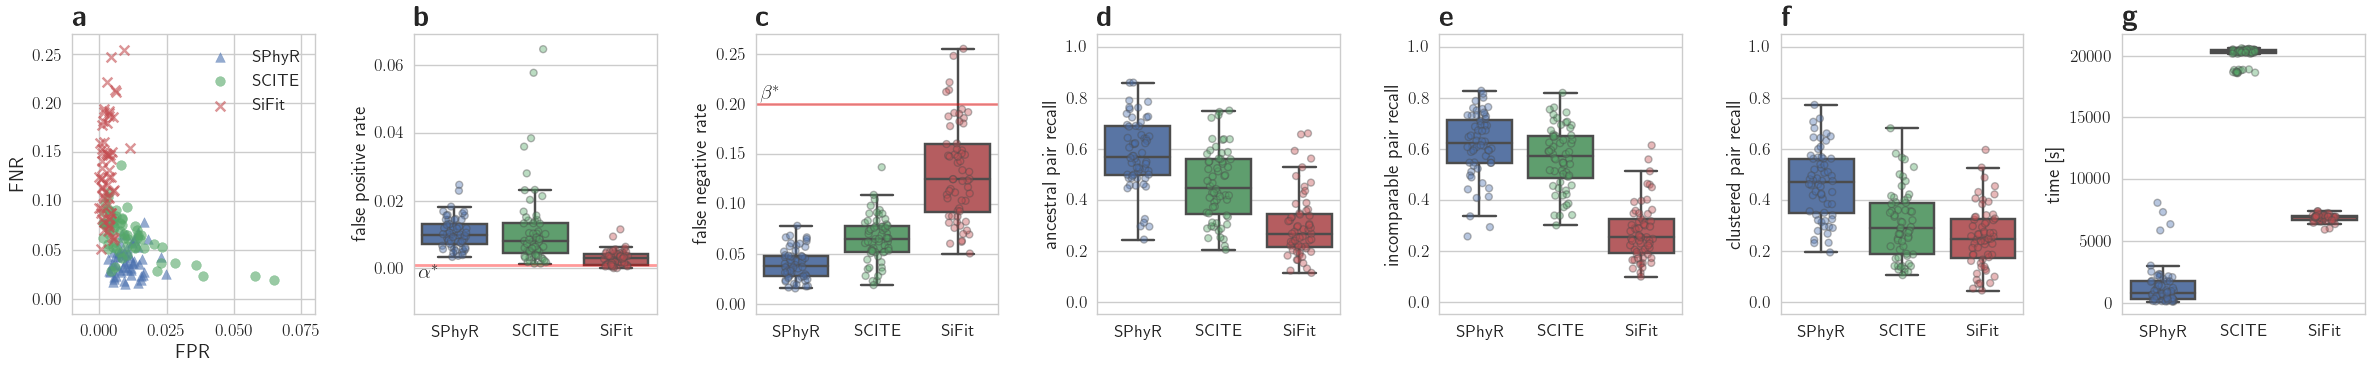

In [25]:
def plotTime(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="time", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="time", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("time [s]")
    ax.set_xticklabels(labels)
    
def plotAncRecall(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="anc_loss_recall", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="anc_loss_recall", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("ancestral pair recall")
    ax.set_ylim((-.05,1.05))
    ax.set_xticklabels(labels)
    
def plotIncRecall(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="inc_loss_recall", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="inc_loss_recall", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("incomparable pair recall")
    ax.set_ylim((-.05,1.05))
    ax.set_xticklabels(labels)
    
def plotClsRecall(methods, ax, labels):
    sns.stripplot(data=df_1, x="method", y="cls_loss_recall", order=methods, jitter=0.15, linewidth=1, alpha="0.4", ax=ax)
    sns.boxplot(data=df_1, x="method", y="cls_loss_recall", order=methods, showfliers=False, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("clustered pair recall")
    ax.set_ylim((-.05,1.05))
    ax.set_xticklabels(labels)

nrRows = 2
nrCols = 7
idx = 1

ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotScatter(df_1, methods, labels, "FPR", "FNR", 0.001, 0.2, (-0.01,0.08), None, "FPR", "FNR", 0.6)
ax.set_title("\huge\\textbf{a}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFPR(methods, ax, labels)
ax.set_title("\huge\\textbf{b}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFNR(methods, ax, labels)
ax.set_title("\huge\\textbf{c}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotAncRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{d}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotIncRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{e}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotClsRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{f}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotTime(methods, ax, labels)
ax.set_title("\huge\\textbf{g}", loc='left')

plt.gcf().set_size_inches(24, 7) 
plt.tight_layout()
plt.savefig("kDPFC_result.pdf")

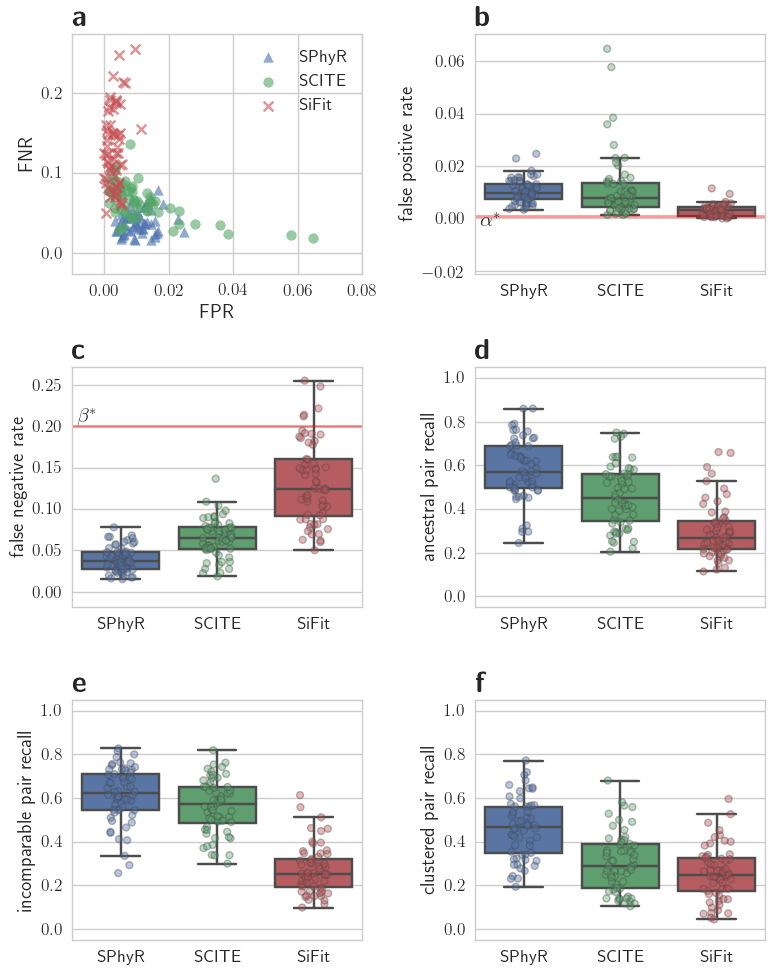

In [26]:
nrRows = 3
nrCols = 2
idx = 1

ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotScatter(df_1, methods, labels, "FPR", "FNR", 0.001, 0.2, (-0.01,0.08), None, "FPR", "FNR", 0.6)
ax.set_title("\huge\\textbf{a}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFPR(methods, ax, labels)
ax.set_title("\huge\\textbf{b}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFNR(methods, ax, labels)
ax.set_title("\huge\\textbf{c}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotAncRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{d}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotIncRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{e}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotClsRecall(methods, ax, labels)
ax.set_title("\huge\\textbf{f}", loc='left')
# ax = plt.subplot(nrRows, nrCols, idx)
# idx += 1
# plotTime(methods, ax, labels)
# ax.set_title("\huge\\textbf{g}", loc='left')

plt.gcf().set_size_inches(8, 10) 
plt.tight_layout()
plt.savefig("kDPFC_result.pdf")

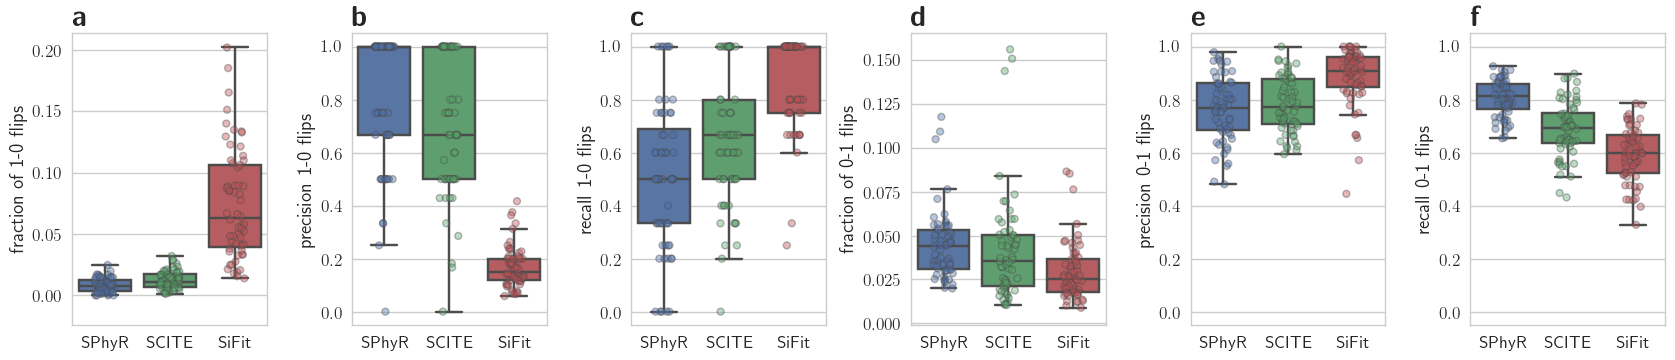

In [27]:
nrRows = 2
nrCols = 6
idx = 1

ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlips10(methods, ax, labels)
ax.set_title("\huge\\textbf{a}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlip10Precision(methods, ax, labels)
ax.set_title("\huge\\textbf{b}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlip10Recall(methods, ax, labels)
ax.set_title("\huge\\textbf{c}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlips01(methods, ax, labels)
ax.set_title("\huge\\textbf{d}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlip01Precision(methods, ax, labels)
ax.set_title("\huge\\textbf{e}", loc='left')
ax = plt.subplot(nrRows, nrCols, idx)
idx += 1
plotFlip01Recall(methods, ax, labels)
ax.set_title("\huge\\textbf{f}", loc='left')

plt.gcf().set_size_inches(17, 7) 
plt.tight_layout()
plt.savefig("kDPFC_result2.pdf")

In [28]:
print "median FNR for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].FNR)
print "median FPR for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].FPR)
print "median fraction of 1-0 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips10_frac)
print "median precision of 1-0 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips10_precision)
print "median recall of 1-0 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips10_recall)
print "median F_1 of 1-0 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips10_F1)
print "median fraction of 0-1 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips01_frac)
print "median precision of 0-1 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips01_precision)
print "median recall of 0-1 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips01_recall)
print "median F_1 of 0-1 flips for SiFit: %.3f" % np.median(df_1[df_1['method'] == "SiFit"].flips01_F1)

print

print "median FNR for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].FNR)
print "median FPR for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].FPR)
print "median fraction of 1-0 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips10_frac)
print "median precision of 1-0 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips10_precision)
print "median recall of 1-0 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips10_recall)
print "median F_1 of 1-0 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips10_F1)
print "median fraction of 0-1 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips01_frac)
print "median precision of 0-1 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips01_precision)
print "median recall of 0-1 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips01_recall)
print "median F_1 of 0-1 flips for SCITE: %.3f" % np.median(df_1[df_1['method'] == "SCITE"].flips01_F1)

print

print "median FPR for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].FPR)
print "median FNR for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].FNR)
print "median fraction of 1-0 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips10_frac)
print "median precision of 1-0 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips10_precision)
print "median recall of 1-0 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips10_recall)
print "median F_1 of 1-0 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips10_F1)
print "median fraction of 0-1 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips01_frac)
print "median precision of 0-1 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips01_precision)
print "median recall of 0-1 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips01_recall)
print "median F_1 of 0-1 flips for SPhyR: %.3f" % np.median(df_1[df_1['method'] == "SPhyR_lT10_lC35"].flips01_F1)

median FNR for SiFit: 0.125
median FPR for SiFit: 0.003
median fraction of 1-0 flips for SiFit: 0.063
median precision of 1-0 flips for SiFit: 0.151
median recall of 1-0 flips for SiFit: 1.000
median F_1 of 1-0 flips for SiFit: 0.258
median fraction of 0-1 flips for SiFit: 0.025
median precision of 0-1 flips for SiFit: 0.910
median recall of 0-1 flips for SiFit: 0.598
median F_1 of 0-1 flips for SiFit: 0.723

median FNR for SCITE: 0.065
median FPR for SCITE: 0.008
median fraction of 1-0 flips for SCITE: 0.011
median precision of 1-0 flips for SCITE: 0.667
median recall of 1-0 flips for SCITE: 0.667
median F_1 of 1-0 flips for SCITE: 0.667
median fraction of 0-1 flips for SCITE: 0.036
median precision of 0-1 flips for SCITE: 0.772
median recall of 0-1 flips for SCITE: 0.693
median F_1 of 0-1 flips for SCITE: 0.720

median FPR for SPhyR: nan
median FNR for SPhyR: nan
median fraction of 1-0 flips for SPhyR: nan
median precision of 1-0 flips for SPhyR: nan
median recall of 1-0 flips for SP

/Users/melkebir/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/melkebir/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
df_2 = df[(df['k'] == 1)]
df_2['FPR'] = df_2['FP']/(df_2['FP'] + df_2['TN'])
df_2['FNR'] = df_2['FN']/(df_2['FN'] + df_2['TP'])
df_2['flips10'] = df_2['flip10_correct'] + df_2['flip10_incorrect']
df_2['flips01'] = df_2['flip01_correct'] + df_2['flip01_incorrect']
df_2['flips10_frac'] = df_2['flips10'] / df_2['ones']
df_2['flips01_frac'] = df_2['flips01'] / df_2['zeros']
# df_1['flips'] = df_1['flip10_correct'] + df_1['flip10_incorrect'] + df_1['flip01_correct'] + df_1['flip01_incorrect']
df_2['flips01_recall'] = df_2['flip01_correct'] / df_2['inFN']
df_2['flips01_precision'] = (df_2['flip01_correct'] / (df_2['flip01_correct'] + df_2['flip01_incorrect'])).fillna(1)
df_2['flips01_F1'] = ((2*df_2['flips01_precision'] * df_2['flips01_recall']) / (df_2['flips01_precision'] + df_2['flips01_recall'])).fillna(0)
df_2['flips10_recall'] = df_2['flip10_correct'] / df_2['inFP']
df_2['flips10_precision'] = (df_2['flip10_correct'] / (df_2['flip10_correct'] + df_2['flip10_incorrect'])).fillna(1)
df_2['flips10_F1'] = ((2*df_2['flips10_precision'] * df_2['flips10_recall']) / (df_2['flips10_precision'] + df_2['flips10_recall'])).fillna(0)
df_2['log_time'] = np.log10(df_2.time)

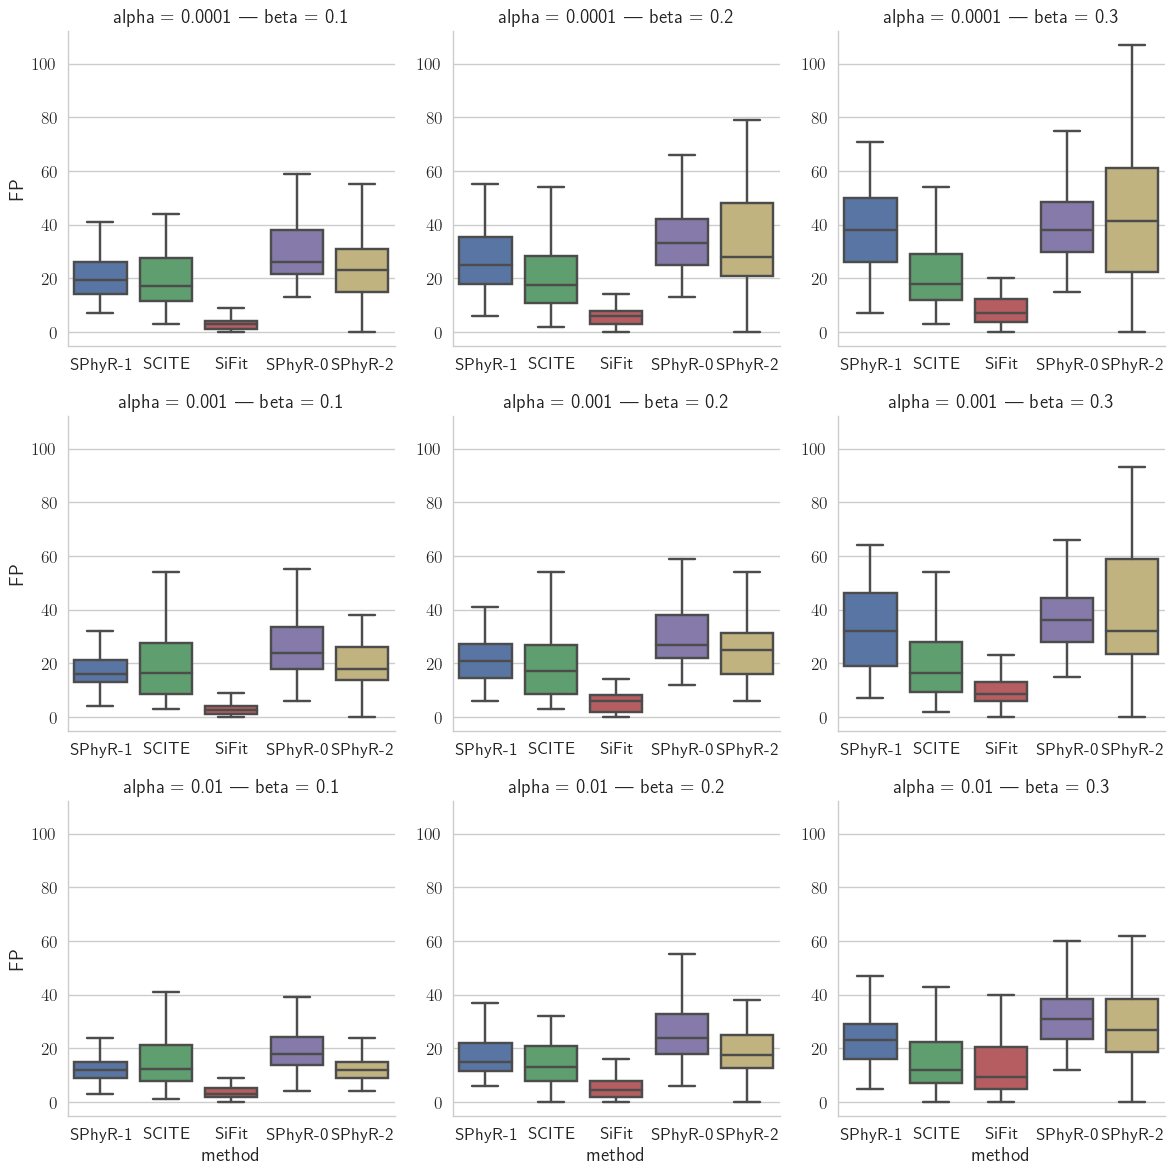

In [30]:
sns.factorplot(data=df_2, x="method", y="FP", row="alpha", order=ext_methods, col="beta", showfliers=False,kind="box")
plt.gca().set_xticklabels(ext_labels)
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_FP_grid.pdf")

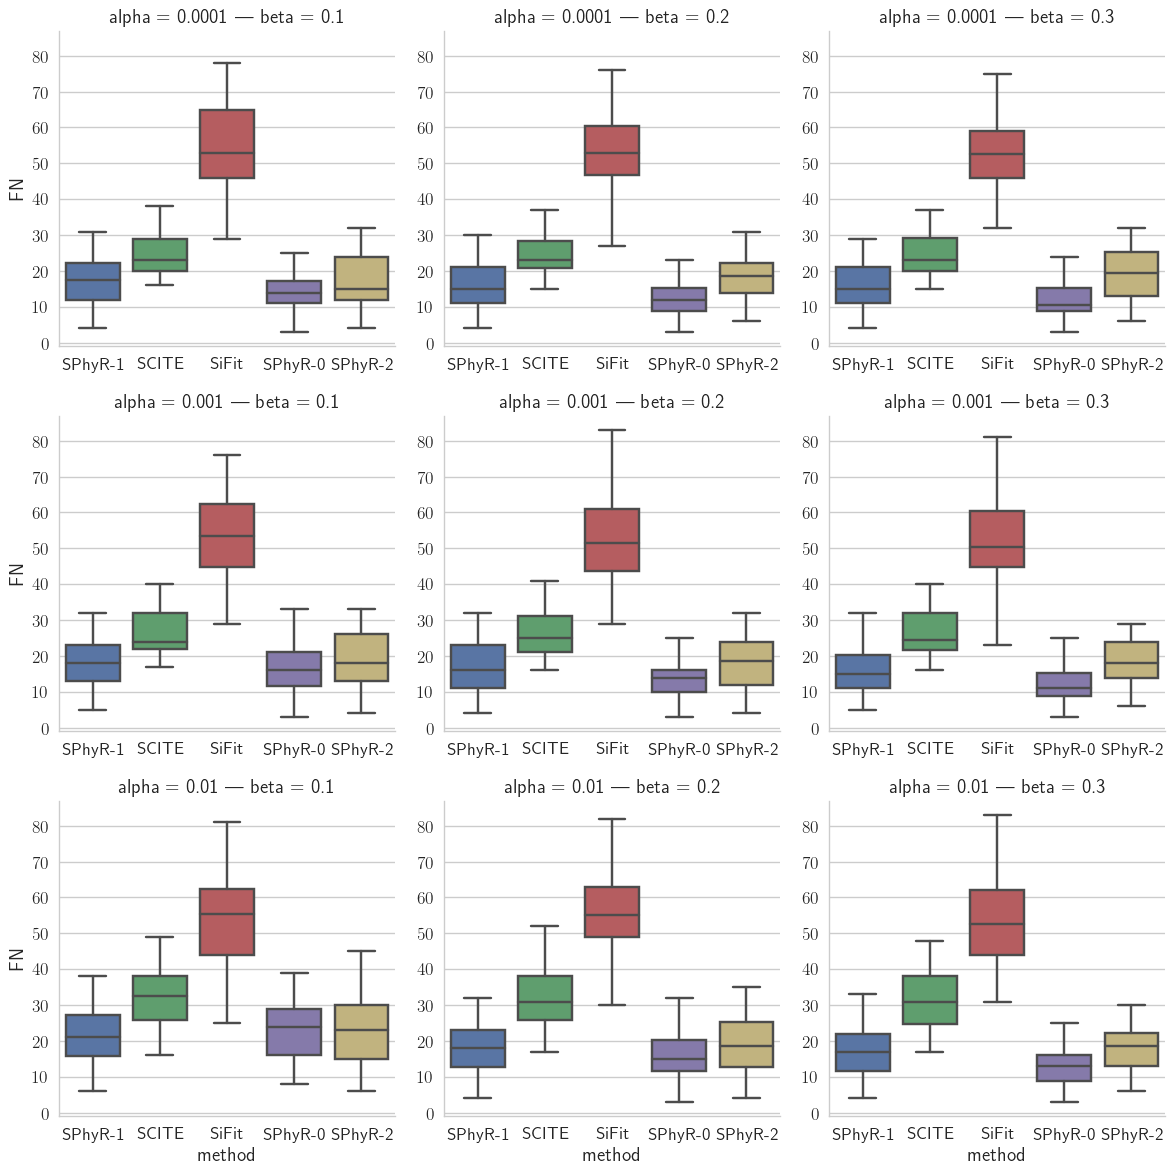

In [31]:
sns.factorplot(data=df_2, x="method", y="FN", row="alpha", order=ext_methods, col="beta", showfliers=False,kind="box")
plt.gca().set_xticklabels(ext_labels)
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_FN_grid.pdf")

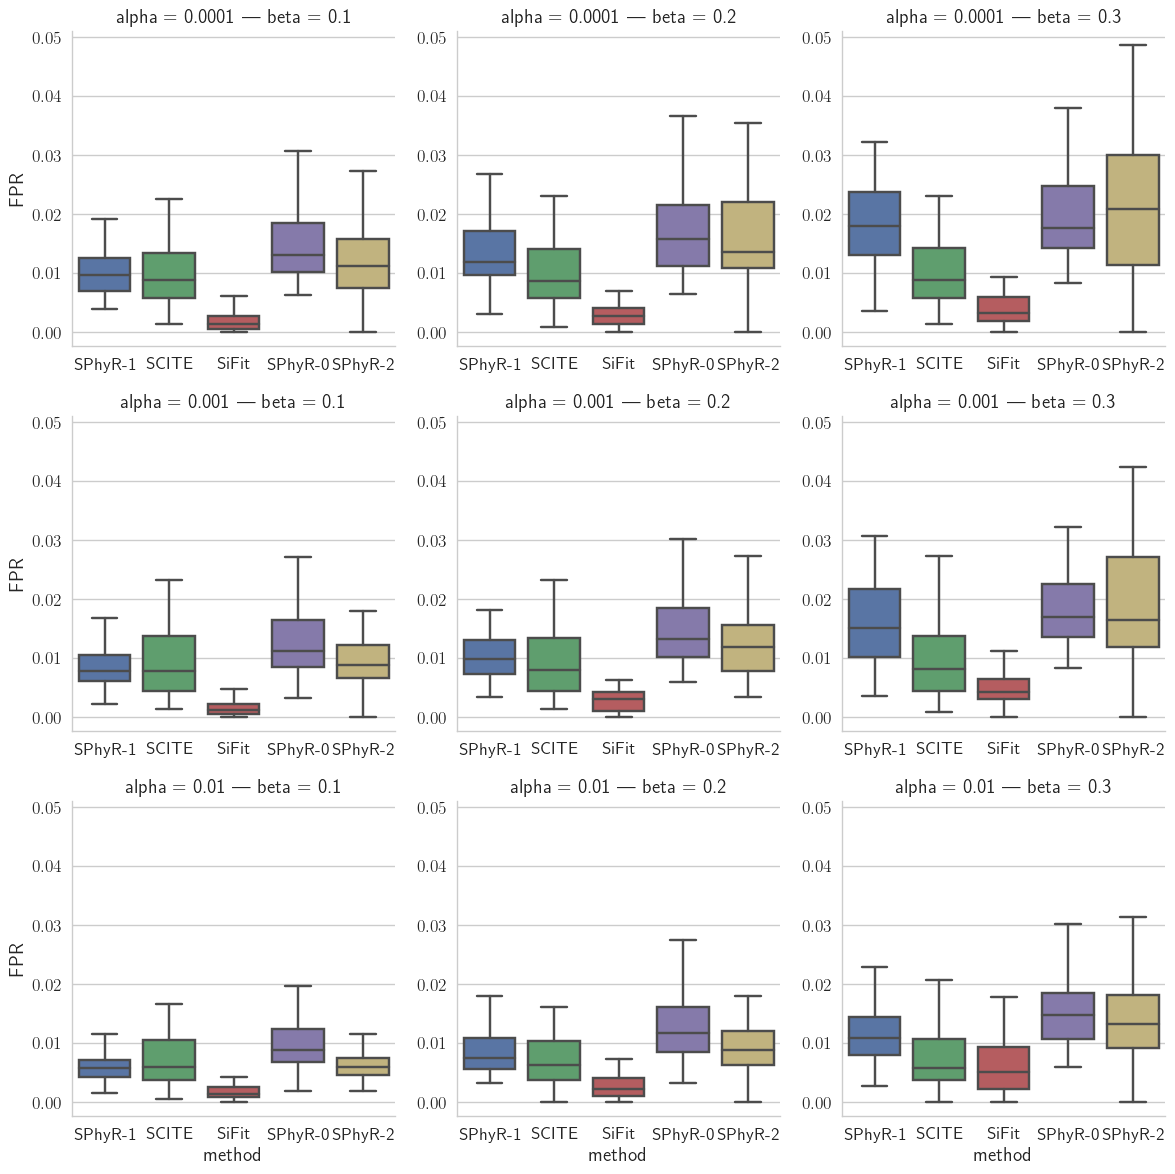

In [32]:
mpl.rc('text', usetex=True)
sns.factorplot(data=df_2, x="method", y="FPR", row="alpha", order=ext_methods, col="beta", showfliers=False,kind="box")
plt.gca().set_xticklabels(ext_labels)
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_FPR_grid.pdf")

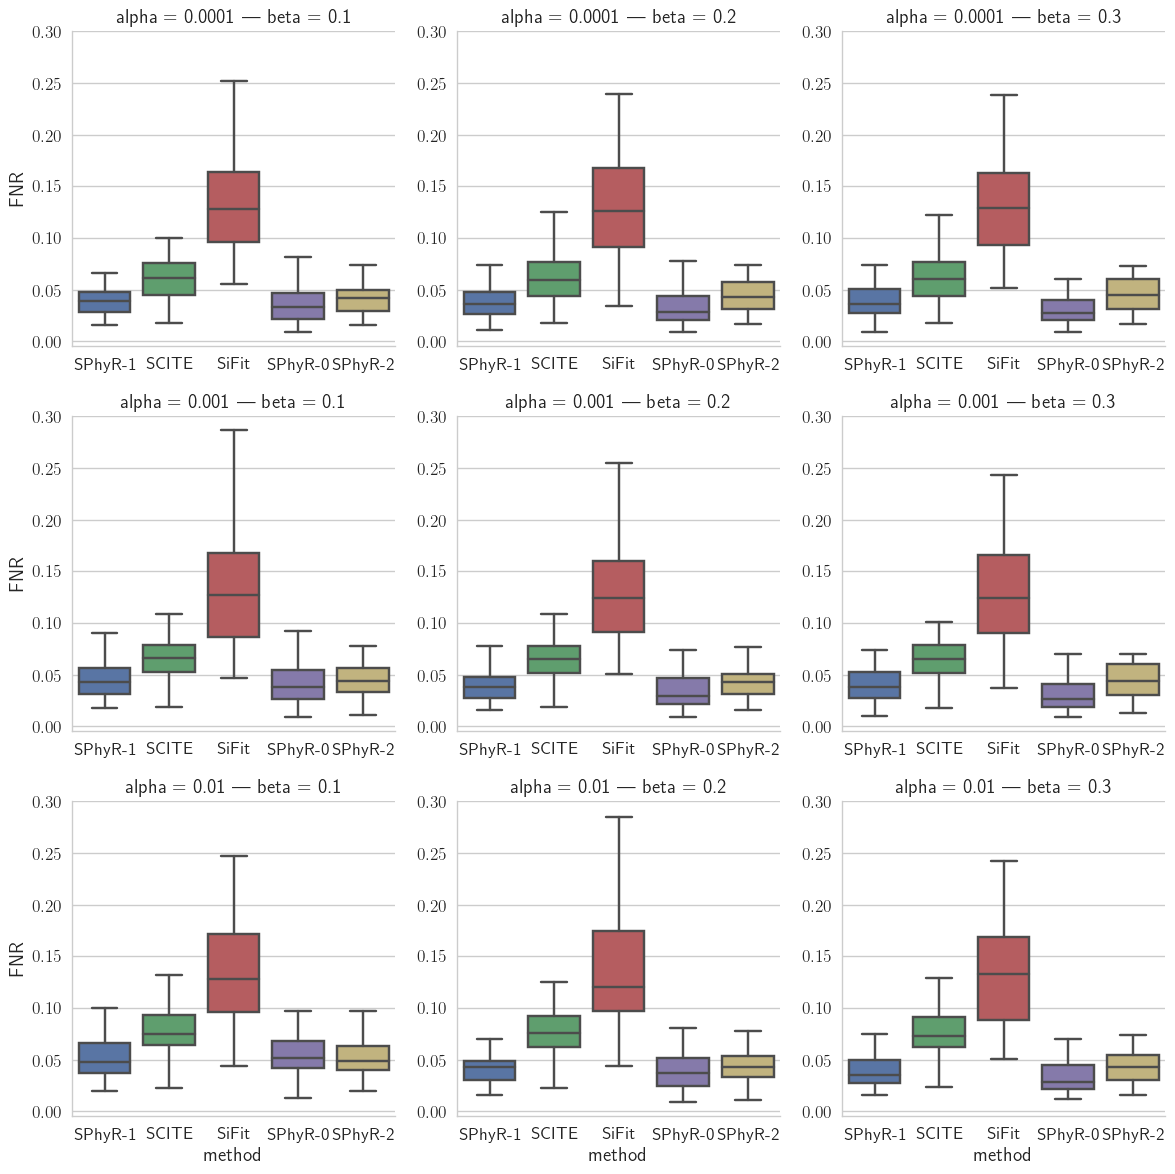

In [33]:
sns.factorplot(data=df_2, row="alpha", y="FNR", x="method", order=ext_methods, col="beta", showfliers=False,kind="box")
plt.gca().set_xticklabels(ext_labels)
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_FNR_grid.pdf")

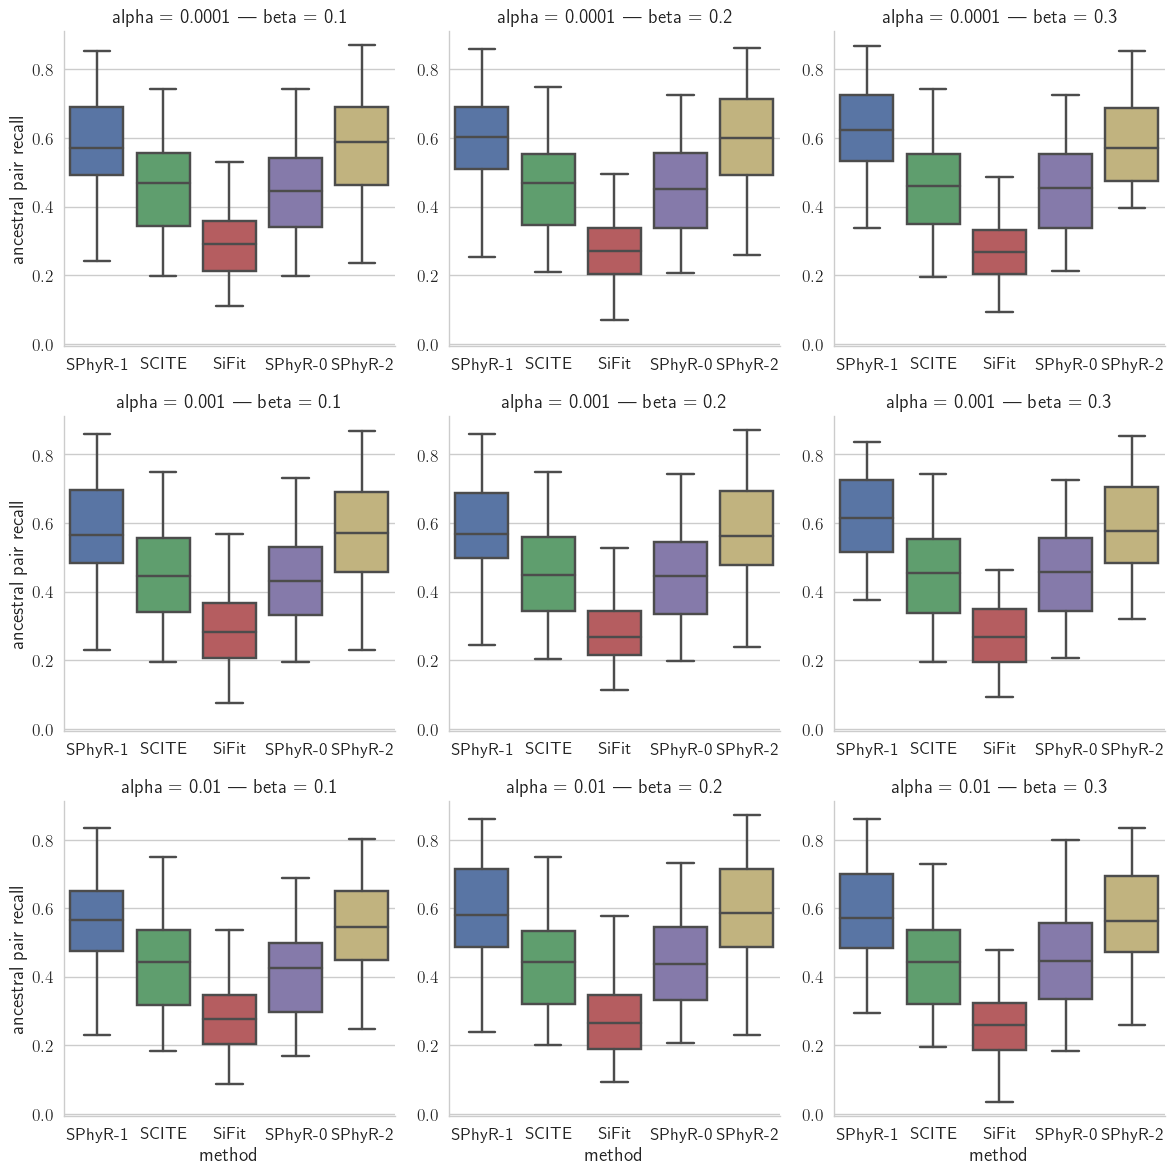

In [34]:
g = sns.factorplot(data=df_2, x="method", y="anc_loss_recall", row="alpha", col="beta", order=ext_methods, showfliers=False,kind="box")
g.axes[0,0].set_xticklabels(ext_labels)
g.axes[0,0].set_ylabel("ancestral pair recall")
g.axes[1,0].set_ylabel("ancestral pair recall")
g.axes[2,0].set_ylabel("ancestral pair recall")
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_ANC_grid.pdf")

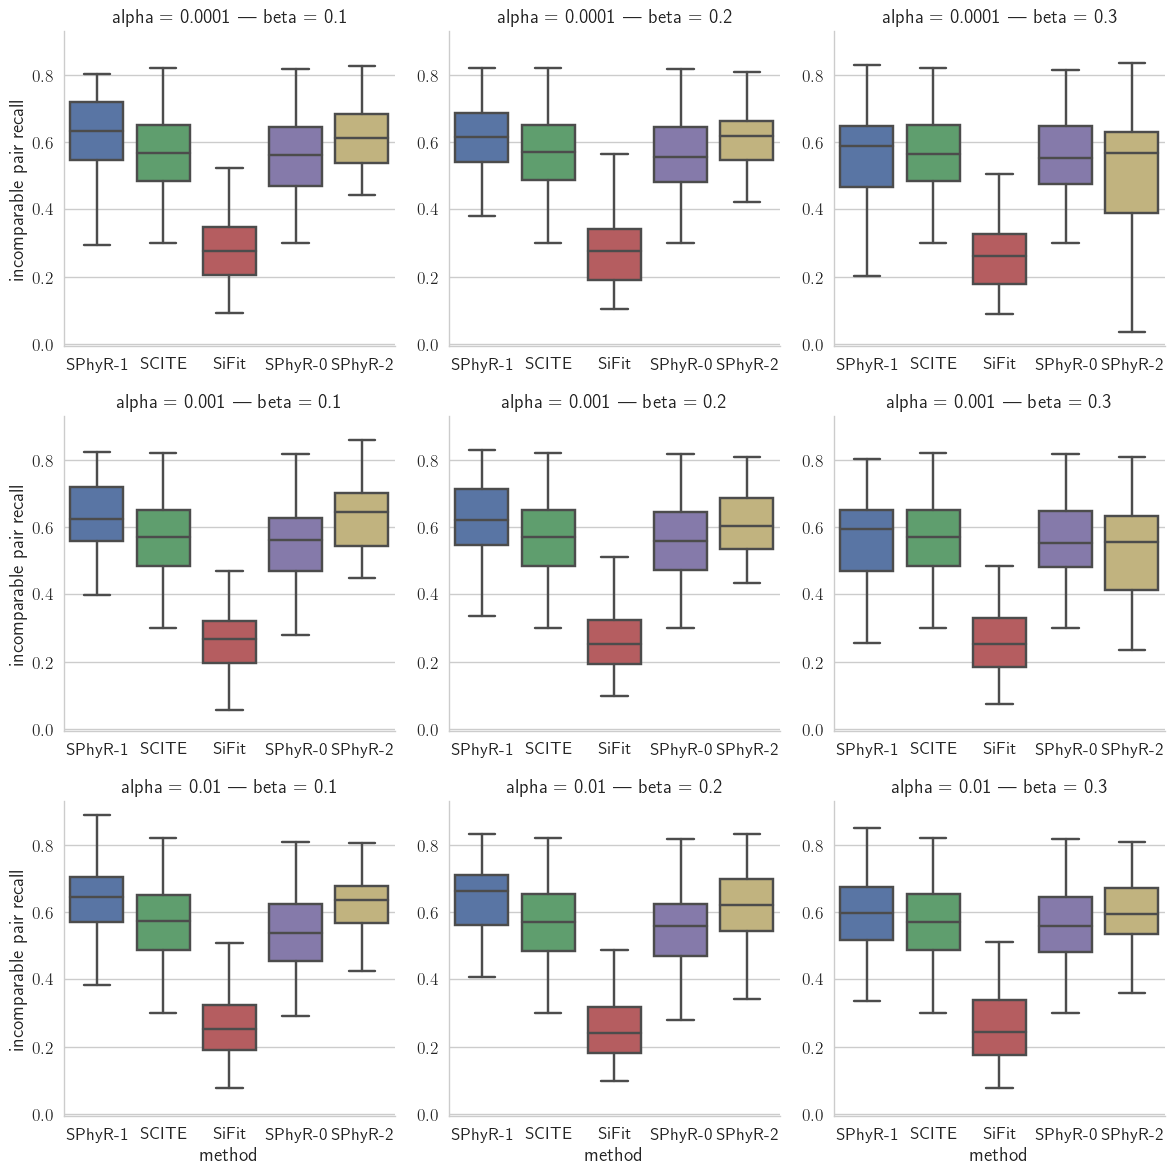

In [35]:
g = sns.factorplot(data=df_2, x="method", y="inc_loss_recall", row="alpha", col="beta", order=ext_methods, showfliers=False,kind="box")
g.axes[0,0].set_xticklabels(ext_labels)
g.axes[0,0].set_ylabel("incomparable pair recall")
g.axes[1,0].set_ylabel("incomparable pair recall")
g.axes[2,0].set_ylabel("incomparable pair recall")
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_INC_grid.pdf")

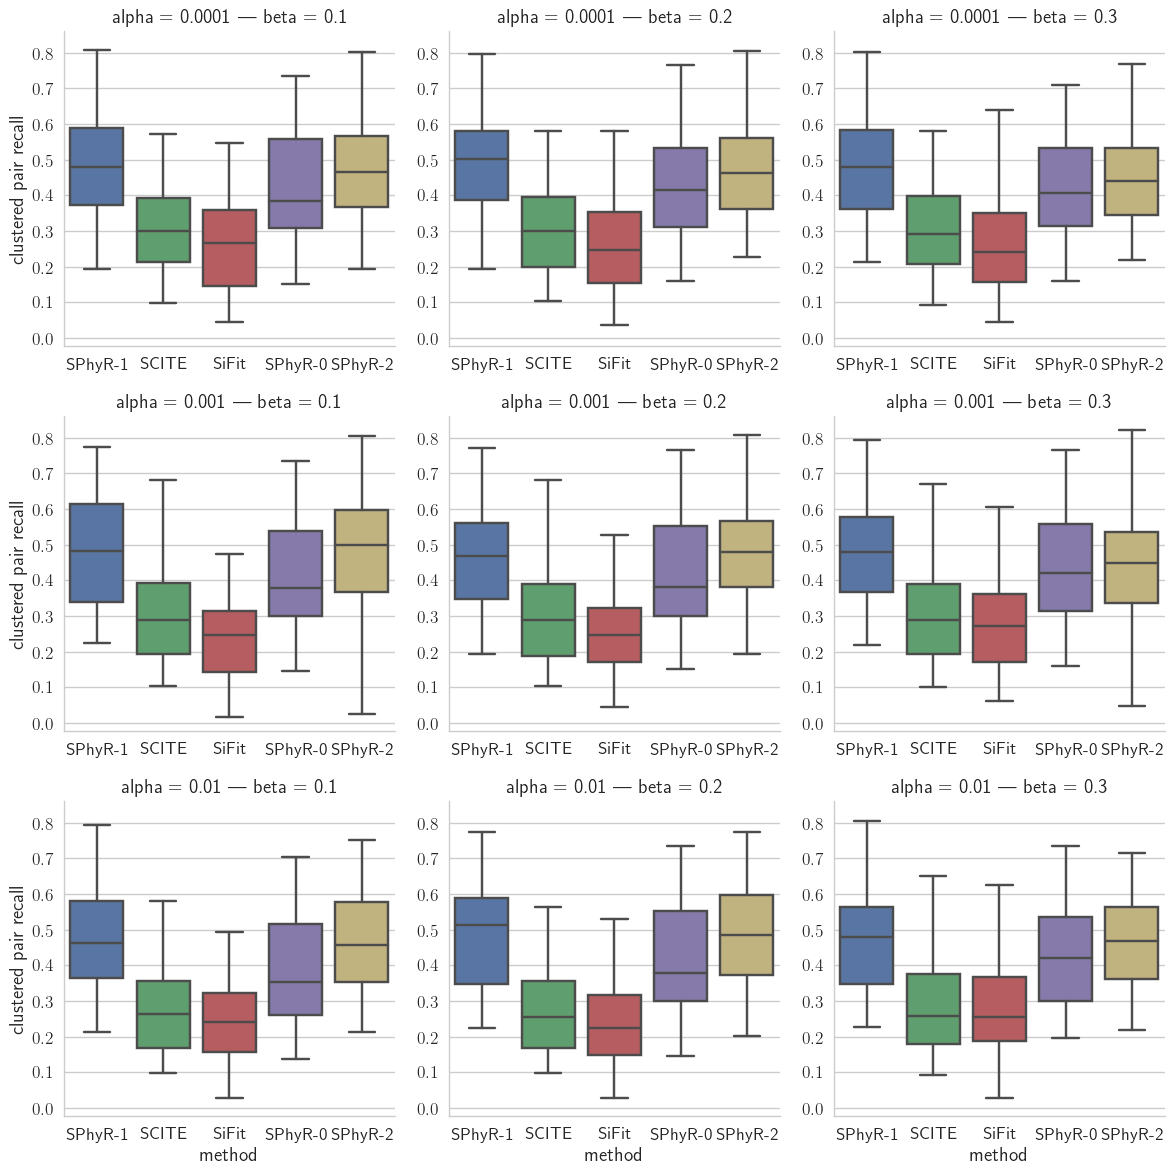

In [36]:
g = sns.factorplot(data=df_2, x="method", y="cls_loss_recall", row="alpha", col="beta", order=ext_methods, showfliers=False,kind="box")
g.axes[0,0].set_xticklabels(ext_labels)
g.axes[0,0].set_ylabel("clustered pair recall")
g.axes[1,0].set_ylabel("clustered pair recall")
g.axes[2,0].set_ylabel("clustered pair recall")
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_CLS_grid.pdf")

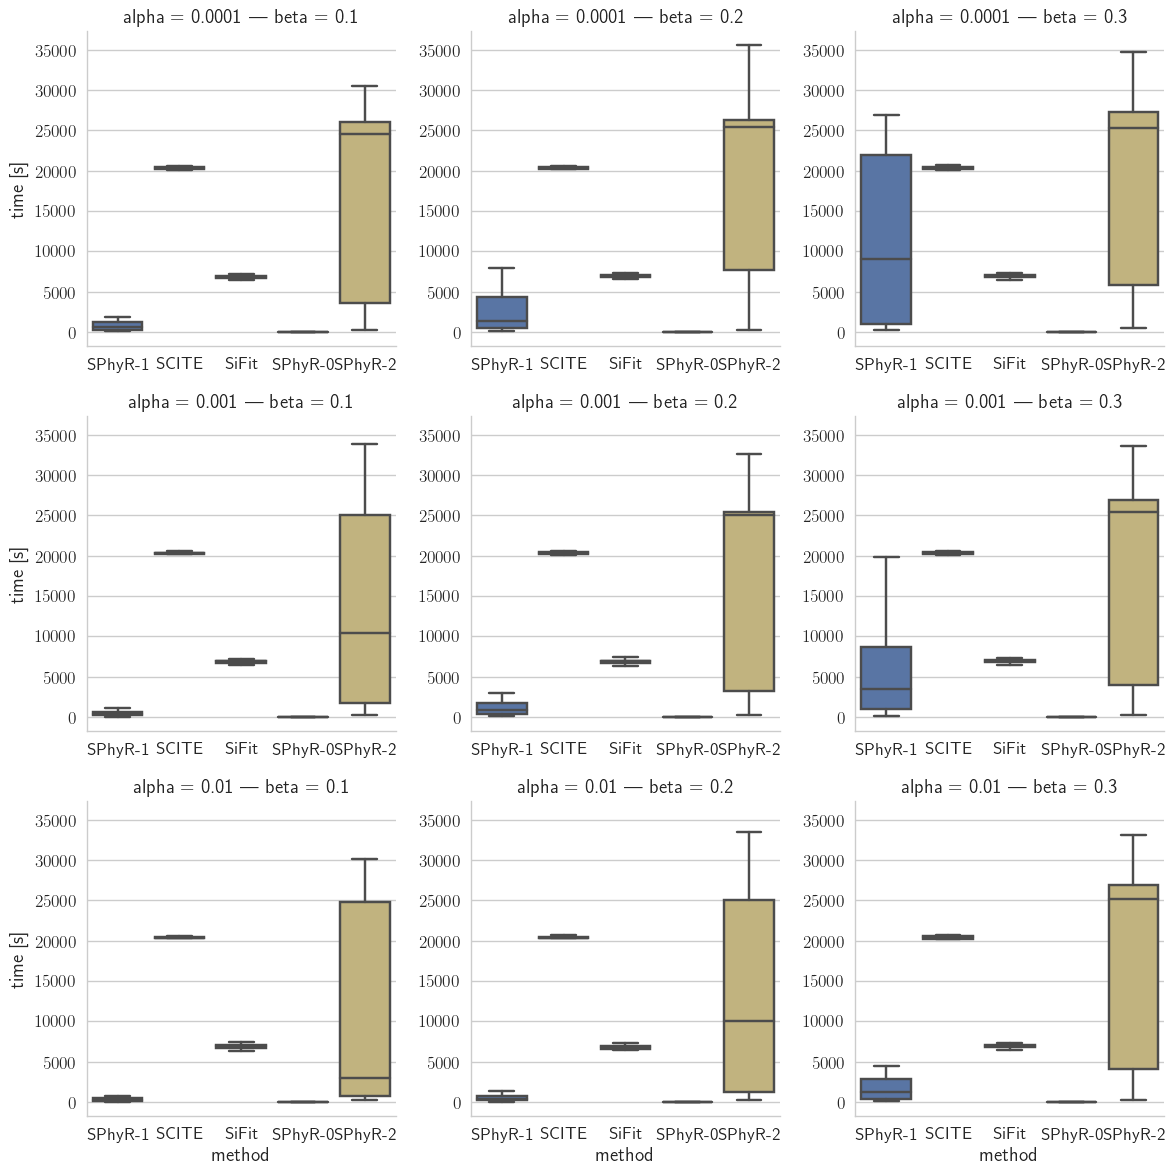

In [37]:
g = sns.factorplot(data=df_2, x="method", y="time", row="alpha", col="beta", order=ext_methods, showfliers=False,kind="box")
g.axes[0,0].set_xticklabels(ext_labels)
g.axes[0,0].set_ylabel("time [s]")
g.axes[1,0].set_ylabel("time [s]")
g.axes[2,0].set_ylabel("time [s]")
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_time_grid.pdf")

In [38]:
def plotGrid(df_2, methods, labels, x, y, x_label, y_label, xlim, ylim, trans):
    nrRows = 3
    nrCols = 3
    idx = 1
    
    for alpha in [0.0001, 0.001, 0.01]:
        for beta in [0.1,0.2,0.3]:
            ax = plt.subplot(nrRows, nrCols, idx)
            idx += 1
            plotScatter(df_2, methods, labels, x, y, alpha, beta, xlim, ylim, "", "", trans)
            ax.set_title("$\\alpha = %.4f$ and $\\beta = %.1f$" % (alpha, beta))
            if alpha == 0.01:
                ax.set_xlabel(x_label)
            if beta == 0.1:
                ax.set_ylabel(y_label)

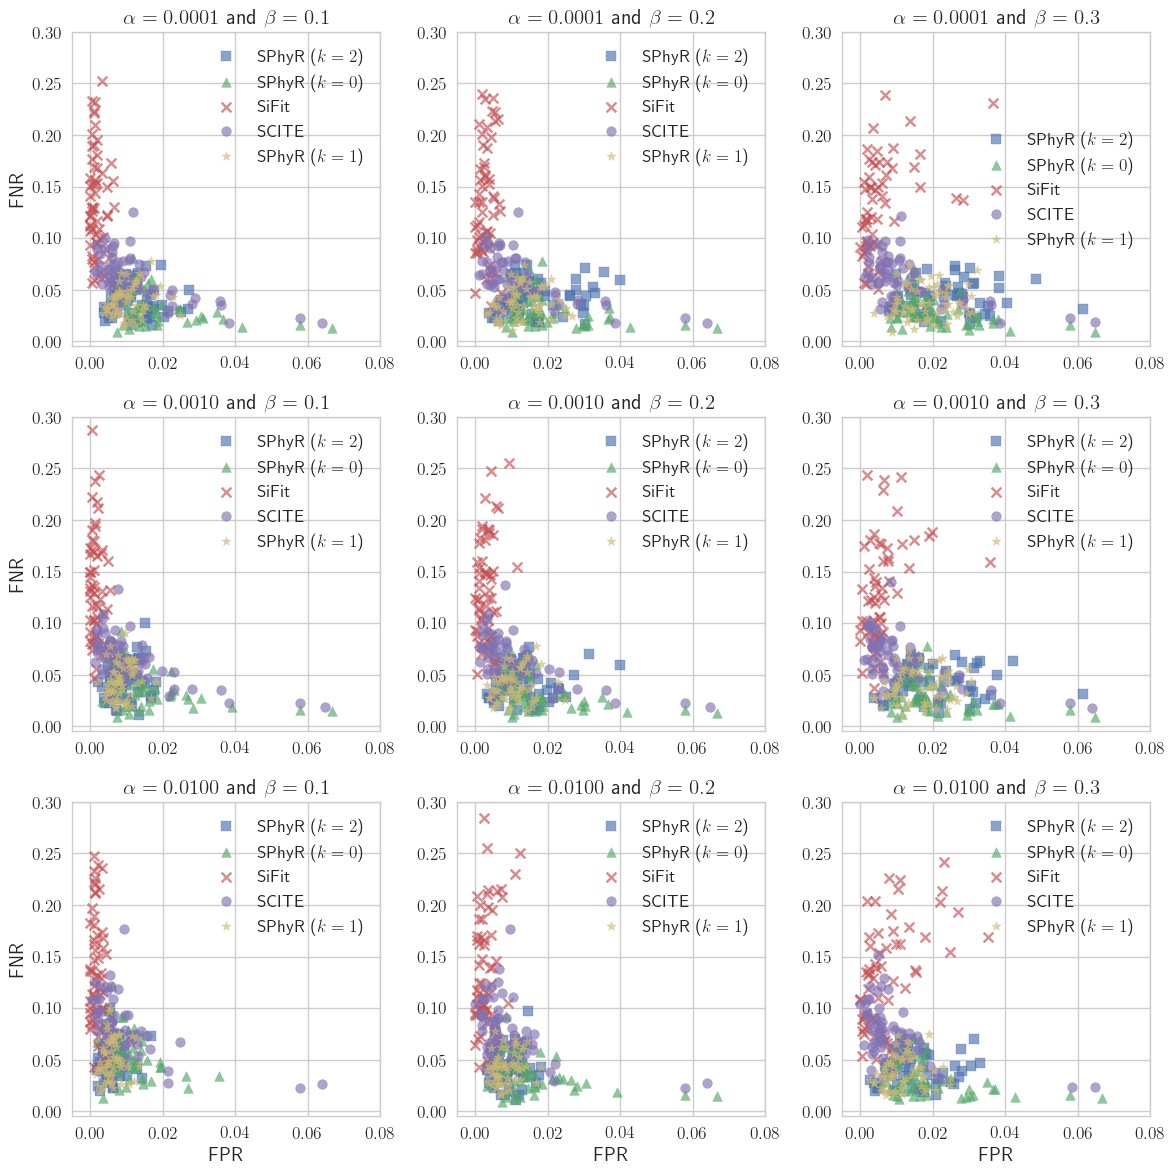

In [39]:
plotGrid(df_2, ["SPhyR_inK1","SCITE", "SiFit", "SPhyR_inK0", "SPhyR_inK2"][::-1], 
         ["SPhyR ($k=1$)", "SCITE", "SiFit", "SPhyR ($k=0$)", "SPhyR ($k=2$)"][::-1], 
         "FPR", "FNR", "FPR", "FNR", (-0.005, 0.08), (-0.005,0.3), 0.65)
plt.gcf().set_size_inches(12, 12) 
plt.tight_layout()
plt.savefig("kDPFC_FPR_FNR_grid.pdf")